# Correlacions entre variables

Buscarem les correlacions del preu del Bitcoin amb el preu del Nasdaq, amb el preu de l'or, amb els tipus d'interés i amb les fases de la lluna per veure quines variables ens interessen pel nostre model.

Ho farem amb dades posteriors a setembre de 2014, moment en que el volum diari de transaccions del Bitcoin va superar els 5MM, ja que les dades dels anys anteriors podrien alterar la predicció.

### Bitcoin dataframe

In [1]:
# Obtenim les dades del Bitcoin
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

bitcoin = yf.download("BTC-USD", start="2014-09-17", end="2023-06-01")
bitcoin

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-05-27,26720.181641,26888.882812,26621.140625,26868.353516,26868.353516,7892015141
2023-05-28,26871.158203,28193.449219,26802.751953,28085.646484,28085.646484,14545229578
2023-05-29,28075.591797,28432.039062,27563.876953,27745.884766,27745.884766,15181308984


In [2]:
# Ens quedem únicament amb la columna "Close"
bitcoin.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
bitcoin.rename(columns={'Close': 'Bitcoin Price'}, inplace=True)
bitcoin['Bitcoin Price'] = bitcoin['Bitcoin Price'].round().astype(int)
bitcoin

,Bitcoin Price
Date,
2014-09-17,457
2014-09-18,424
2014-09-19,395
2014-09-20,409
2014-09-21,399
...,...
2023-05-27,26868
2023-05-28,28086
2023-05-29,27746


### NASDAQ Dataframe

In [3]:
# Obtenim les dades del NASDAQ
nasdaq = yf.download("^IXIC", start="2014-09-17", end="2023-06-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
nasdaq

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,4553.959961,4582.399902,4539.359863,4562.189941,4562.189941,1796710000
2014-09-18,4575.740234,4593.979980,4572.620117,4593.430176,4593.430176,1774840000
2014-09-19,4606.129883,4610.569824,4563.439941,4579.790039,4579.790039,3178490000
2014-09-22,4568.450195,4568.870117,4513.120117,4527.689941,4527.689941,1881520000
2014-09-23,4511.319824,4536.029785,4508.419922,4508.689941,4508.689941,1847730000
...,...,...,...,...,...,...
2023-05-24,12481.889648,12529.629883,12415.849609,12484.160156,12484.160156,4088270000
2023-05-25,12706.440430,12736.919922,12604.889648,12698.089844,12698.089844,4651640000
2023-05-26,12736.419922,13001.910156,12729.740234,12975.690430,12975.690430,4434070000


In [5]:
# Ens quedem únicament amb la columna "Close"
nasdaq.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
nasdaq.rename(columns={'Close': 'Nasdaq Price'}, inplace=True)

nasdaq

,Nasdaq Price
Date,
2014-09-17,4562.189941
2014-09-18,4593.430176
2014-09-19,4579.790039
2014-09-22,4527.689941
2014-09-23,4508.689941
...,...
2023-05-24,12484.160156
2023-05-25,12698.089844
2023-05-26,12975.690430


In [6]:
# Omplim els dies que falten (ja que només hi ha valors de dilluns a divendres) amb el valor anterior

# Creem un nou dataframe amb totes les dates
date_range = pd.date_range(start=nasdaq.index.min(), end=nasdaq.index.max(), freq='D')
df_filled = pd.DataFrame(index=date_range)

# Unim el dataframe original amb el nou utilitzant left join
nasdaq = df_filled.join(nasdaq)

# Omplim els valors faltants amb el valor anterior
nasdaq.fillna(method='ffill', inplace=True)
nasdaq = nasdaq.round().astype(int)
nasdaq = nasdaq.rename_axis("Date")
nasdaq

,Nasdaq Price
Date,
2014-09-17,4562
2014-09-18,4593
2014-09-19,4580
2014-09-20,4580
2014-09-21,4580
...,...
2023-05-27,12976
2023-05-28,12976
2023-05-29,12976


### Gold dataframe

In [7]:
# Obtenim les dades de l'or
gold = yf.download("GC=F", start="2014-09-17", end="2023-06-01")
gold

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,1236.199951,1236.199951,1221.900024,1234.400024,1234.400024,10
2014-09-18,1216.199951,1225.699951,1216.199951,1225.699951,1225.699951,5
2014-09-19,1218.300049,1218.300049,1215.300049,1215.300049,1215.300049,4
2014-09-22,1214.900024,1216.800049,1212.400024,1216.800049,1216.800049,7
2014-09-23,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,5
...,...,...,...,...,...,...
2023-05-24,1975.400024,1975.400024,1962.800049,1962.800049,1962.800049,189
2023-05-25,1943.099976,1943.099976,1943.099976,1943.099976,1943.099976,1
2023-05-26,1948.199951,1948.400024,1944.099976,1944.099976,1944.099976,166036


In [8]:
# Ens quedem únicament amb la columna "Close"
gold.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
gold.rename(columns={'Close': 'Gold Price'}, inplace=True)
gold

,Gold Price
Date,
2014-09-17,1234.400024
2014-09-18,1225.699951
2014-09-19,1215.300049
2014-09-22,1216.800049
2014-09-23,1221.000000
...,...
2023-05-24,1962.800049
2023-05-25,1943.099976
2023-05-26,1944.099976


In [9]:
# Omplim els dies que falten (ja que només hi ha valors de dilluns a divendres) amb el valor anterior

# Creem un nou dataframe amb totes les dates
df_filled2 = pd.DataFrame(index=date_range)

# Unim el dataframe original amb el nou utilitzant left join
gold = df_filled2.join(gold)

# Omplim els valors faltants amb el valor anterior
gold.fillna(method='ffill', inplace=True)
gold = gold.round().astype(int)
gold = gold.rename_axis("Date")
gold

,Gold Price
Date,
2014-09-17,1234
2014-09-18,1226
2014-09-19,1215
2014-09-20,1215
2014-09-21,1215
...,...
2023-05-27,1944
2023-05-28,1944
2023-05-29,1944


### Interest Rates dataframe

In [10]:
# Importem el dataset dels tipus d'interés d'USA
IR = pd.read_csv("FEDFUNDS.csv")
IR

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
823,2023-02-01,4.57
824,2023-03-01,4.65
825,2023-04-01,4.83
826,2023-05-01,5.06


In [11]:
# Canviem els noms de les columnes
IR.rename(columns={'DATE': 'Date', 'FEDFUNDS': 'Rates'}, inplace=True)

# Es tracta d'un dataframe mensual. El convertirem en un dataframe diari
IR["Date"] = pd.to_datetime(IR["Date"])
IR.set_index("Date", inplace=True)
IR = IR.resample("D").ffill()
IR = IR[IR.index >= pd.to_datetime("2014-09-17")]

IR

,Rates
Date,
2014-09-17,0.09
2014-09-18,0.09
2014-09-19,0.09
2014-09-20,0.09
2014-09-21,0.09
...,...
2023-05-28,5.06
2023-05-29,5.06
2023-05-30,5.06


In [12]:
# Mostrem la mateixa data que les altres variables
IR = IR.loc[:"2023-05-31"]

IR

,Rates
Date,
2014-09-17,0.09
2014-09-18,0.09
2014-09-19,0.09
2014-09-20,0.09
2014-09-21,0.09
...,...
2023-05-27,5.06
2023-05-28,5.06
2023-05-29,5.06


### Moon Phases dataframe

In [13]:
import lunardate

start_date = pd.to_datetime('2014-09-07')
end_date = pd.to_datetime('2023-05-31')

lunar_phases = []

for date in pd.date_range(start_date, end_date):

    lunar_day = lunardate.LunarDate.fromSolarDate(date.year, date.month, date.day).day

    if lunar_day == 1:
        lunar_phase = 'New'
    elif lunar_day == 15:
        lunar_phase = 'Full'
    else:
        lunar_phase = 'Other'

    lunar_phases.append((date, lunar_phase))


moon = pd.DataFrame(lunar_phases, columns=['Date', 'Moon phase'])

# Establim la columna "Date" com a índex
moon.set_index('Date', inplace=True)

# Reemplacem els valors "Other" per la fase de la lluna anterior
moon['Moon phase'] = moon['Moon phase'].replace('Other', method='ffill')

# Filtrem el dataframe per eliminar files amb la fase "Other"
moon = moon[(moon['Moon phase'] != 'Other') & (moon.index >= pd.to_datetime('2014-09-17'))]

moon

,Moon phase
Date,
2014-09-17,Full
2014-09-18,Full
2014-09-19,Full
2014-09-20,Full
2014-09-21,Full
...,...
2023-05-27,New
2023-05-28,New
2023-05-29,New


In [14]:
# Unim els dataframes per la columna "Date"
df = pd.merge(bitcoin, nasdaq, on="Date", how="outer")
df = pd.merge(df, gold, on="Date", how="outer")
df = pd.merge(df, IR, on="Date", how="outer")
df = pd.merge(df, moon, on="Date", how="outer")

# Ordenar el dataframe por la columna "Date"
df = df.sort_values(by="Date")

df

,Bitcoin Price,Nasdaq Price,Gold Price,Rates,Moon phase
Date,,,,,
2014-09-17,457,4562,1234,0.09,Full
2014-09-18,424,4593,1226,0.09,Full
2014-09-19,395,4580,1215,0.09,Full
2014-09-20,409,4580,1215,0.09,Full
2014-09-21,399,4580,1215,0.09,Full
...,...,...,...,...,...
2023-05-27,26868,12976,1944,5.06,New
2023-05-28,28086,12976,1944,5.06,New
2023-05-29,27746,12976,1944,5.06,New


In [15]:
# Comprovem que no hi hagi nulls
df.isna().sum()

Bitcoin Price    0
Nasdaq Price     0
Gold Price       0
Rates            0
Moon phase       0
dtype: int64

### Bitcoin vs Nasdaq & Gold

Farem una comparació gràfica dels preus del Bitcoin, del Nasdaq i de l'or per a comparar la seva evolució en l'última dècada.

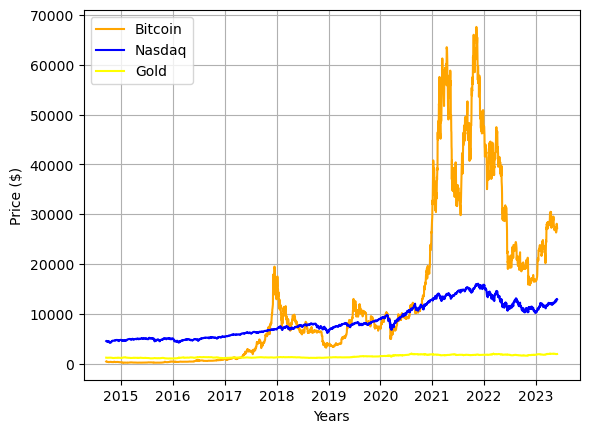

In [16]:
# Fem un plot dels 3 valors (Bitcoin, Nasdaq i or) per comparar l'evolució dels seus preus en l'última dècada
plt.plot(df.index, df['Bitcoin Price'], label='Bitcoin', color='orange')
plt.plot(df.index, df['Nasdaq Price'], label='Nasdaq', color='blue')
plt.plot(df.index, df['Gold Price'], label='Gold', color='yellow')
plt.xlabel('Years')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

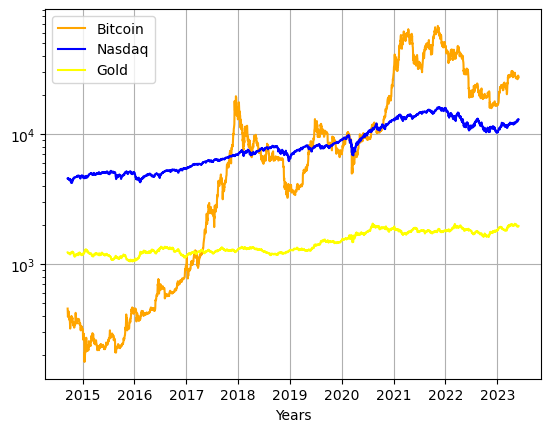

In [17]:
# Fem el mateix però en escala logarítmica per veure quant ha crescut cada valor dins de la seva pròpia magnitud
plt.plot(df.index, df['Bitcoin Price'], label='Bitcoin', color='orange')
plt.plot(df.index, df['Nasdaq Price'], label='Nasdaq', color='blue')
plt.plot(df.index, df['Gold Price'], label='Gold', color='yellow')
plt.yscale('log')
plt.xlabel('Years')
plt.legend()
plt.grid(True)
plt.show()

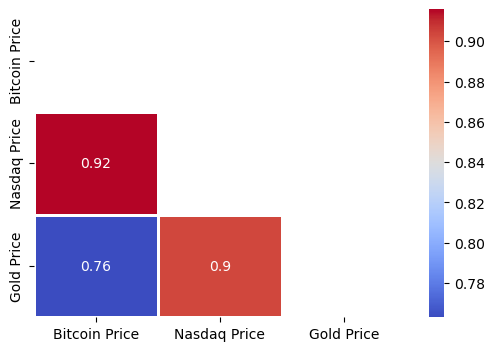

In [18]:
# Fem un heatmap per a visualitzar la correlació
import seaborn as sns

df_values = df[['Bitcoin Price', 'Nasdaq Price', 'Gold Price']]
plt.figure(figsize=(6, 4))
corr_matrix = df_values.corr()
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(df_values.corr(), mask=mask, cmap='coolwarm', linewidths=1, linecolor='white', annot=True)
plt.show()

### Bitcoin vs Interest Rates

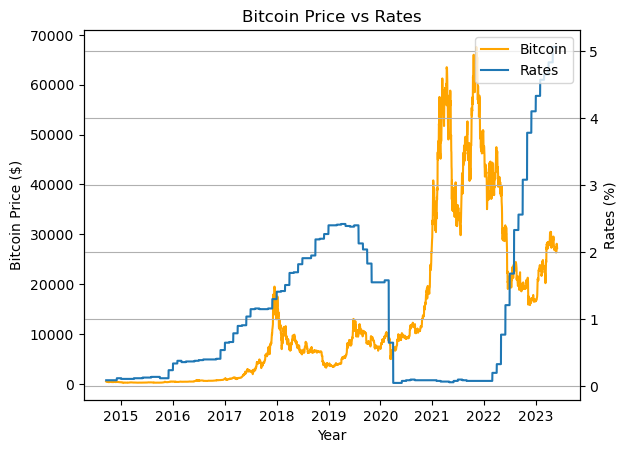

In [19]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Bitcoin Price ($)')
ax1.plot(df.index, df['Bitcoin Price'], label='Bitcoin', color='orange')

ax2 = ax1.twinx()
ax2.set_ylabel('Rates (%)')
ax2.plot(df.index, df['Rates'], label='Rates', color='tab:blue')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Bitcoin Price vs Rates')
plt.xlabel('Year')

plt.grid(True)
plt.show()

In [20]:
# Comprovem la correlació del preu del Bitcoin amb els tipus d'interés en el total d'anys
bitcoin_price = df['Bitcoin Price']
interest_rates = df['Rates']

correlation = np.corrcoef(bitcoin_price, interest_rates)[0, 1]

print(f"Correlació entre Bitcoin i tipus d'interés en el total d'anys: {correlation.round(2)}")

Correlació entre Bitcoin i tipus d'interés en el total d'anys: -0.03


Si mirem el total d'anys no té cap correlació.

In [21]:
# Comprovem la correlació del preu del Bitcoin amb els tipus d'interés a partir de març del 2020
df_bitcoin_2020 = df[df.index >= '2020-03-01']
bitcoin_price_2020 = df_bitcoin_2020['Bitcoin Price']
df_rates_2020 = df[df.index >= '2020-03-01']
interest_rates_2020 = df_rates_2020['Rates']

correlation = np.corrcoef(bitcoin_price_2020, interest_rates_2020)[0, 1]

print(f"Correlació entre Bitcoin i tipus d'interés a partir del març del 2020: {correlation.round(2)}")


Correlació entre Bitcoin i tipus d'interés a partir del març del 2020: -0.27


In [22]:
df_filtered = df[df.index >= '2020-01-01']

years = df_filtered.index.year.unique()

for year in years:
    df_year = df_filtered[df_filtered.index.year == year]
    bitcoin_price = df_year['Bitcoin Price']
    interest_rates = df_year['Rates']
    correlation = np.corrcoef(bitcoin_price, interest_rates)[0, 1]
    print(f"Correlació en l'any {year}: {correlation.round(2)}")

Correlació en l'any 2020: -0.29
Correlació en l'any 2021: -0.48
Correlació en l'any 2022: -0.89
Correlació en l'any 2023: 0.77


### Bitcoin vs moon

Comprovarem si això és cert:

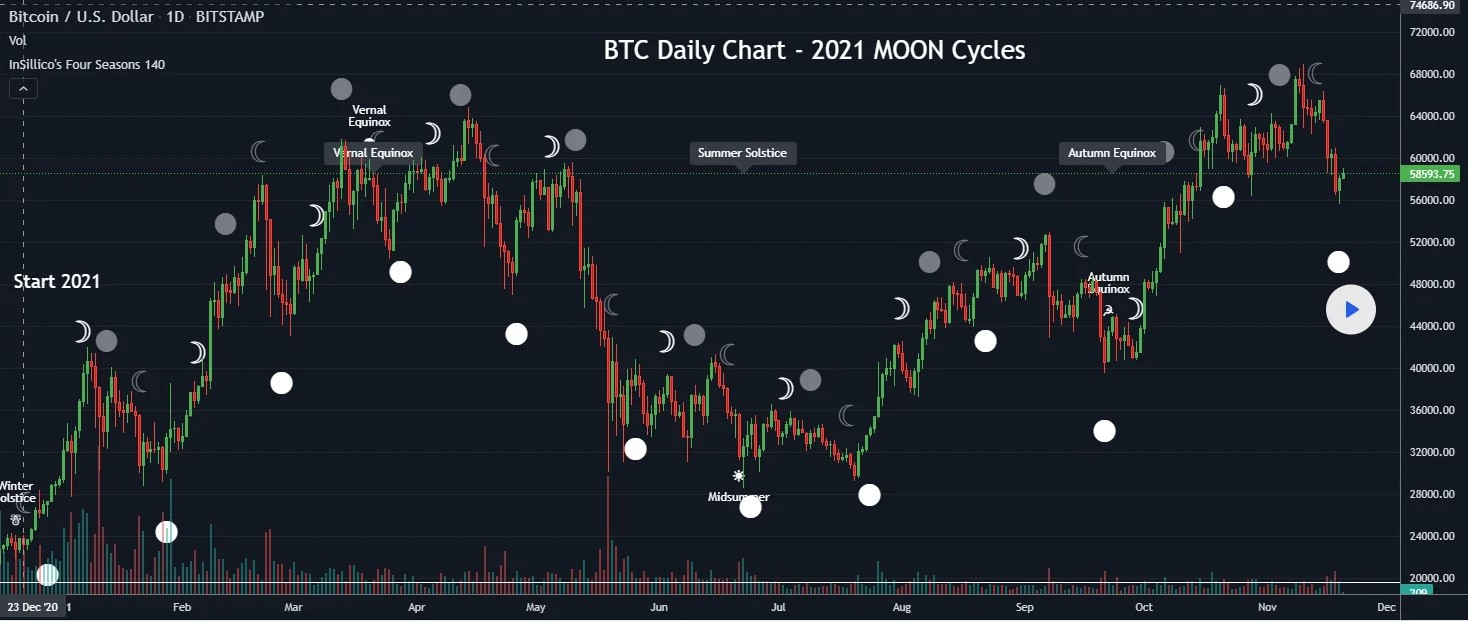

Com podem veure en aquest gràfic del preu del Bitcoin durant l'any 2021, quan hi ha lluna nova el preu del bitcoin cau, quan hi ha lluna plena el preu del bitcoin puja. 

Comprovarem si això sol passar.

In [23]:
# Creem la columna 'Fase', que combina la fase de la lluna i el seu número corresponent
moon['Phase'] = moon['Moon phase'] + ' ' + (moon['Moon phase'] != moon['Moon phase'].shift()).cumsum().astype(str)

# Resetear el índice para convertirlo en una columna
moon.reset_index(inplace=True)

# Agrupem per la columna 'Fase' i obtenim el rang de dies
moon_ranges = moon.groupby('Phase')['Date'].agg(['min', 'max'])

# Obtenim el preu del Bitcoin a l'inici i al final de cada rang
moon_ranges['First Bitcoin Price'] = moon_ranges['min'].map(df['Bitcoin Price'])
moon_ranges['Last Bitcoin Price'] = moon_ranges['max'].map(df['Bitcoin Price'])

# Calculem el canvi de preu del Bitcoin en cada rang
moon_ranges['Bitcoin Price Change'] = moon_ranges.apply(lambda row: 'Up' if row['Last Bitcoin Price'] > row['First Bitcoin Price'] else 'Down', axis=1)

# Canviem noms de les columnes
moon_ranges.rename(columns={'min': 'First Day', 'max': 'Last Day'}, inplace=True)

# Ordenem per data d'inici
moon_ranges.sort_values('First Day', inplace=True)

moon_ranges

,First Day,Last Day,First Bitcoin Price,Last Bitcoin Price,Bitcoin Price Change
Phase,,,,,
Full 1,2014-09-17,2014-09-23,457,436,Down
New 2,2014-09-24,2014-10-07,423,336,Down
Full 3,2014-10-08,2014-10-23,353,358,Up
New 4,2014-10-24,2014-11-06,358,349,Down
Full 5,2014-11-07,2014-11-21,342,351,Up
...,...,...,...,...,...
New 212,2023-03-22,2023-04-04,27307,28168,Up
Full 213,2023-04-05,2023-04-19,28178,28823,Up
New 214,2023-04-20,2023-05-03,28246,29006,Up


In [24]:
# Filtrem les files que contenen "Full" o "New" en la columna 'Phase'
full_mask = moon_ranges.index.str.contains('Full')
new_mask = moon_ranges.index.str.contains('New')

# Comptem "Up" i "Down" a cada grup
full_up_count = moon_ranges.loc[full_mask, 'Bitcoin Price Change'].value_counts().get('Up', 0)
full_down_count = moon_ranges.loc[full_mask, 'Bitcoin Price Change'].value_counts().get('Down', 0)
new_up_count = moon_ranges.loc[new_mask, 'Bitcoin Price Change'].value_counts().get('Up', 0)
new_down_count = moon_ranges.loc[new_mask, 'Bitcoin Price Change'].value_counts().get('Down', 0)

# Calculem el total de fases "Full" i "New"
total_full_count = full_up_count + full_down_count
total_new_count = new_up_count + new_down_count

# Calculem els percentatges
full_up_percent = full_up_count / total_full_count * 100
full_down_percent = full_down_count / total_full_count * 100
new_up_percent = new_up_count / total_new_count * 100
new_down_percent = new_down_count / total_new_count * 100

results_df = pd.DataFrame({
    'Total Full Phases': [total_full_count],
    'Full Up Count': [full_up_count],
    'Full Down Count': [full_down_count],
    'Total New Phases': [total_new_count],
    'New Up Count': [new_up_count],
    'New Down Count': [new_down_count],
    'Full Up %': [full_up_percent],
    'Full Down %': [full_down_percent],
    'New Up %': [new_up_percent],
    'New Down %': [new_down_percent]
})

results_df = results_df.round(0).astype(int)

results_df.index = [' ']

results_df.T

,
Total Full Phases,108
Full Up Count,58
Full Down Count,50
Total New Phases,108
New Up Count,66
New Down Count,42
Full Up %,54
Full Down %,46
New Up %,61
New Down %,39


Durant la fase de lluna nova, el preu va caure el 39% de vegades.

Durant la fase de lluna plena, el preu va pujar un 54% de vegades.

Sembla que no es compleix. Mirarem si es comença a complir a partir de l'any 2021.

In [25]:
# Filtrem les files de l'any 2021
moon_ranges_2021 = moon_ranges[(moon_ranges['First Day'].dt.year >= 2021)]

moon_ranges_2021.head()

,First Day,Last Day,First Bitcoin Price,Last Bitcoin Price,Bitcoin Price Change
Phase,,,,,
New 158,2021-01-13,2021-01-26,37316,32570,Down
Full 159,2021-01-27,2021-02-11,30433,47909,Up
New 160,2021-02-12,2021-02-25,47505,47094,Down
Full 161,2021-02-26,2021-03-12,46340,57332,Up
New 162,2021-03-13,2021-03-26,61243,55137,Down


In [26]:
# Filtrem les files que contenen "Full" o "New" en la columna 'Phase'
full_mask_2021 = moon_ranges_2021.index.str.contains('Full')
new_mask_2021 = moon_ranges_2021.index.str.contains('New')

# Comptem "Up" i "Down" a cada grup
full_up_count_2021 = moon_ranges_2021.loc[full_mask_2021, 'Bitcoin Price Change'].value_counts().get('Up', 0)
full_down_count_2021 = moon_ranges_2021.loc[full_mask_2021, 'Bitcoin Price Change'].value_counts().get('Down', 0)
new_up_count_2021 = moon_ranges_2021.loc[new_mask_2021, 'Bitcoin Price Change'].value_counts().get('Up', 0)
new_down_count_2021 = moon_ranges_2021.loc[new_mask_2021, 'Bitcoin Price Change'].value_counts().get('Down', 0)

# Calculem el total de fases "Full" i "New"
total_full_count_2021 = full_up_count_2021 + full_down_count_2021
total_new_count_2021 = new_up_count_2021 + new_down_count_2021

# Calculem els percentatges
full_up_percent_2021 = full_up_count_2021 / total_full_count_2021 * 100
full_down_percent_2021 = full_down_count_2021 / total_full_count_2021 * 100
new_up_percent_2021 = new_up_count_2021 / total_new_count_2021 * 100
new_down_percent_2021 = new_down_count_2021 / total_new_count_2021 * 100

results_df_2021 = pd.DataFrame({
    'Total Full Phases': [total_full_count_2021],
    'Full Up Count': [full_up_count_2021],
    'Full Down Count': [full_down_count_2021],
    'Total New Phases': [total_new_count_2021],
    'New Up Count': [new_up_count_2021],
    'New Down Count': [new_down_count_2021],
    'Full Up %': [full_up_percent_2021],
    'Full Down %': [full_down_percent_2021],
    'New Up %': [new_up_percent_2021],
    'New Down %': [new_down_percent_2021]
})

results_df_2021 = results_df_2021.round(0).astype(int)

results_df_2021.index = [' ']

results_df_2021.T

,
Total Full Phases,29
Full Up Count,15
Full Down Count,14
Total New Phases,30
New Up Count,14
New Down Count,16
Full Up %,52
Full Down %,48
New Up %,47
New Down %,53


Els resultats estàn al voltant del 50%, per tant podem afirmar que no hi ha cap tipus d'influència de la lluna en el preu.

Descartarem aquesta variable.